In [ ]:
# Исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.
#1. Загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений 
#(если есть – удалить).
#2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
#3. На каких платформах произошло больше всего релизов?
#4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?
#5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
#6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
#7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: 
#Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

In [85]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
games = pd.read_csv('games.csv')

In [46]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [88]:
games= games.dropna()

In [89]:
games['Year'] = games['Year'].astype('int')

In [72]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [73]:
stats.mode(games.Year)

ModeResult(mode=array([2009]), count=array([1431]))

In [ ]:
#Постройте график распределения количества выпущенных игр по годам.

In [12]:
data = games.groupby('Year', as_index = False).Name.count().rename(columns = {'Name': 'Count_games'}).sort_values('Year')
data.head()

,Year,Count_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


In [90]:
years = data.Year.values

<function matplotlib.pyplot.show(*args, **kw)>

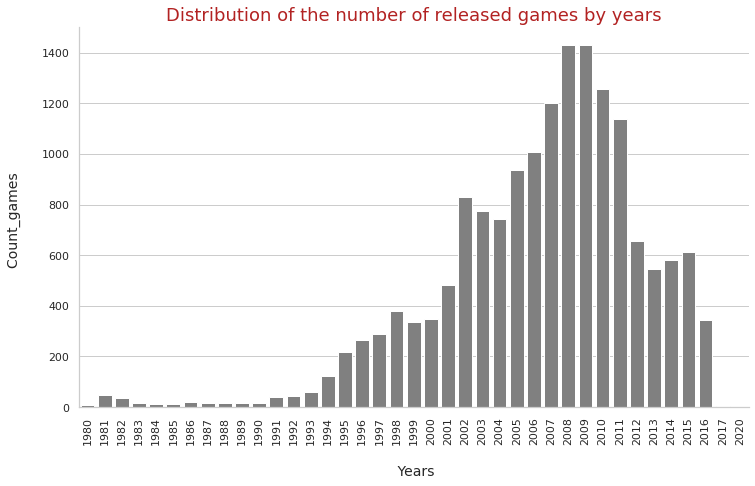

In [143]:
sns.set(
        style = 'whitegrid',
        rc = {'figure.figsize': (12,7)}
        #color = 'grey'
)
#bars = ax.bar(x, y, color='silver')
ax = sns.barplot(x = 'Year', y = 'Count_games', data = data, color='grey' )
ax.set_xticklabels(data.Year, rotation = 90)
ax.set_title('Distribution of the number of released games by years', fontsize = 18, color = 'firebrick')
ax.set_xlabel('\n Years', fontsize = 14)
ax.set_ylabel('Count_games \n', fontsize = 14)
sns.despine()
plt.show

In [ ]:
#На каких платформах произошло больше всего релизов?

In [14]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [28]:
platform_values = games.Platform.value_counts(normalize = True).to_frame().sort_values('Platform', ascending = False) \
    .reset_index().rename(columns = {'Platform': 'pl_percentage','index': 'Platform'})
platform_values.pl_percentage = platform_values.pl_percentage.apply(lambda x: x *100)
platform_values.head()

,Platform,pl_percentage
0,DS,13.080842
1,PS2,13.056289
2,PS3,8.004420
3,Wii,7.918483
4,X360,7.574735


In [31]:
#Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%.
platform_values[platform_values.pl_percentage > 7].Platform.values

array(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS'], dtype=object)

In [ ]:
#Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [38]:
games.Publisher.value_counts().to_frame().sort_values('Publisher', ascending = False) \
    .reset_index().rename(columns = {'Publisher': 'pub_count','index': 'Publisher'}).head(1)

,Publisher,pub_count
0,Electronic Arts,1339


In [ ]:
#Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного 
#издателя в разных регионах (NA, EU, JP, Other). 
#В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)

In [90]:
Nintendo_games = games[games.Publisher == 'Nintendo']

In [43]:
#1 способ (самый быстрый)
Nintendo_games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


In [50]:
#2 способ
print('For NA region median = {}, average = {}, std = {}.'.format(round(Nintendo_games.NA_Sales.median(),3), 
                                                          round(Nintendo_games.NA_Sales.mean(),3), 
                                                          round(Nintendo_games.NA_Sales.std(),3)))
print('For EU region median = {}, average = {}, std = {}.'.format(round(Nintendo_games.EU_Sales.median(),3), 
                                                          round(Nintendo_games.EU_Sales.mean(),3), 
                                                          round(Nintendo_games.EU_Sales.std(),3)))
print('For JP region median = {}, average = {}, std = {}.'.format(round(Nintendo_games.JP_Sales.median(),3), 
                                                          round(Nintendo_games.JP_Sales.mean(),3), 
                                                          round(Nintendo_games.JP_Sales.std(),3)))
print('For Other region median = {}, average = {}, std = {}.'.format(round(Nintendo_games.Other_Sales.median(),3), 
                                                          round(Nintendo_games.Other_Sales.mean(),3), 
                                                          round(Nintendo_games.Other_Sales.std(),3)))

For NA region median = 0.375, average = 1.172, std = 2.99.
For EU region median = 0.12, average = 0.601, std = 1.744.
For JP region median = 0.28, average = 0.654, std = 1.063.
For Other region median = 0.03, average = 0.137, std = 0.464.


In [ ]:
#Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

In [58]:
Nintendo_games_JP = Nintendo_games.reindex(['Rank', 'Genre', 'JP_Sales'], axis = 1)
Nintendo_games_JP.head()

,Rank,Genre,JP_Sales
0,1,Sports,3.77
1,2,Platform,6.81
2,3,Racing,3.79
3,4,Sports,3.28
4,5,Role-Playing,10.22


In [60]:
Nintendo_games_JP.pivot(index = 'Rank', columns = 'Genre', values = 'JP_Sales').describe()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,78.000000,35.000000,18.000000,100.000000,111.000000,74.000000,37.000000,105.000000,24.000000,28.000000,55.000000,31.000000
mean,0.373846,0.257429,0.830000,0.552500,0.922162,0.501216,0.789730,0.970952,0.251250,0.844643,0.652182,0.337419
std,0.554997,0.514909,0.843529,0.786361,1.181532,0.835924,1.132714,1.661960,0.316685,1.269434,0.948470,0.402409
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.080000,0.030000,0.132500,0.050000,0.225000,0.080000,0.100000,0.160000,0.077500,0.072500,0.060000,0.060000
50%,0.170000,0.090000,0.500000,0.250000,0.540000,0.255000,0.340000,0.360000,0.130000,0.390000,0.250000,0.190000
75%,0.460000,0.230000,1.365000,0.730000,1.080000,0.602500,0.890000,0.740000,0.282500,0.967500,0.715000,0.445000
max,3.960000,2.690000,2.660000,4.160000,6.810000,5.320000,4.130000,10.220000,1.440000,5.330000,3.770000,1.380000


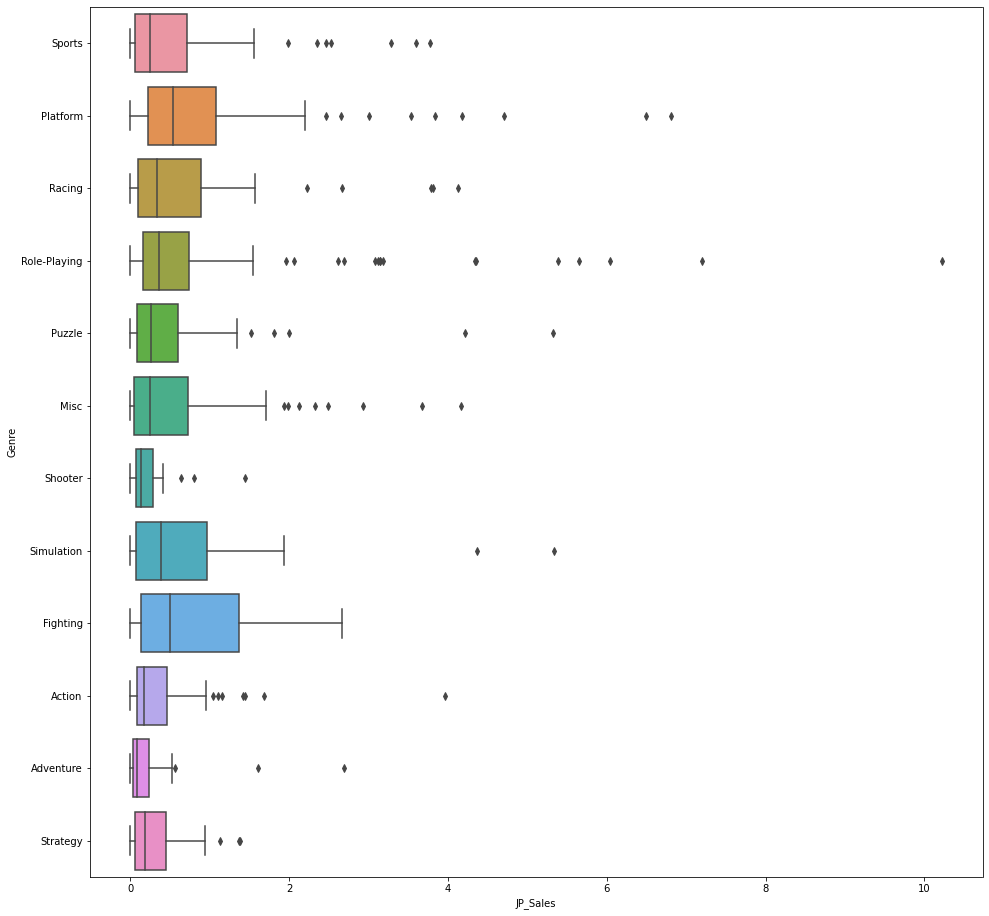

In [63]:
#Визуализиуем данные
plt.figure(figsize = (16,16))
sns.boxplot(x = Nintendo_games_JP.JP_Sales, y = Nintendo_games_JP.Genre)

In [ ]:
#Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: 
#Fighting, Simulation, Platform, Racing, Sports.

In [91]:
Nintendo_global = Nintendo_games.reindex(['Year', 'Genre', 'Global_Sales'], axis = 1)

In [92]:
Genres = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']
Nintendo_global = Nintendo_global[Nintendo_global.Genre.isin(Genres)]
Nintendo_global = Nintendo_global.groupby(['Year', 'Genre'], as_index = False).Global_Sales.sum().sort_values(['Year', 'Genre'])
Nintendo_global.head()

,Year,Genre,Global_Sales
0,1983,Platform,5.62
1,1983,Sports,3.20
2,1984,Racing,5.68
3,1984,Sports,6.18
4,1985,Platform,43.17


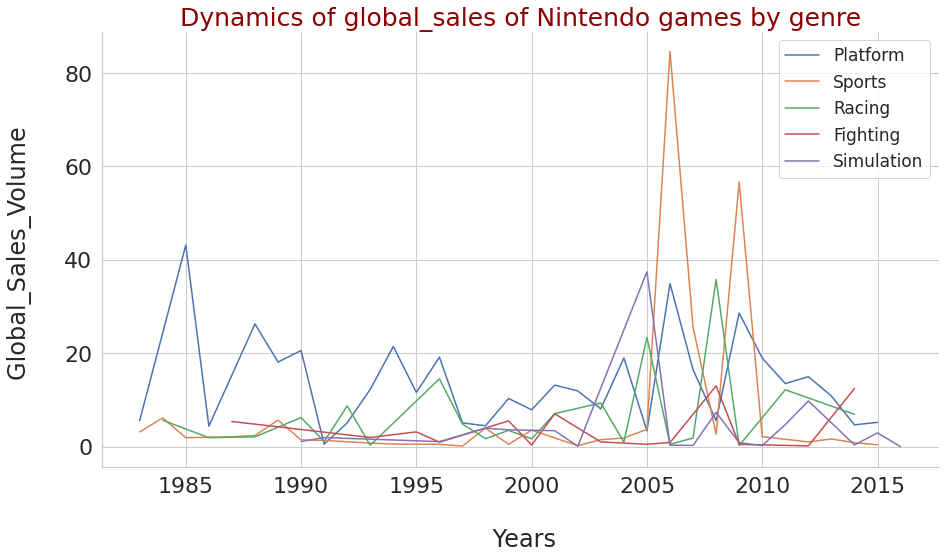

In [148]:
sns.set(
        font_scale = 2,
        style = 'whitegrid',
        rc = {'figure.figsize': (15,8)})
ax = sns.lineplot(data = Nintendo_global, x = 'Year', y = 'Global_Sales', hue = 'Genre')
sns.despine()
ax.set_title('Dynamics of global_sales of Nintendo games by genre', fontsize = 25, color = 'darkred')
ax.set_xlabel('\n Years')
ax.set_ylabel('Global_Sales_Volume \n')
ax.legend(fontsize = 17)
